In [2]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
df_covid_vaccine = pd.read_csv('country_vaccinations.csv')

In [3]:
df_covid_vaccine.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df_covid_vaccine.tail(5)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3614,Wales,NaN,2021-02-15,803178.0,795927.0,7251.0,12967.0,24418.0,25.47,25.24,0.23,7745.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3615,Wales,NaN,2021-02-16,820339.0,807351.0,12988.0,17161.0,23033.0,26.02,25.61,0.41,7305.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3616,Wales,NaN,2021-02-17,841975.0,822633.0,19342.0,21636.0,22012.0,26.70,26.09,0.61,6982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3617,Wales,NaN,2021-02-18,864498.0,839065.0,25433.0,22523.0,20649.0,27.42,26.61,0.81,6549.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3618,Wales,NaN,2021-02-19,885906.0,853904.0,32002.0,21408.0,18891.0,28.10,27.08,1.02,5992.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [5]:
#checking the coulumns
df_covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3619 non-null   object 
 1   iso_code                             3343 non-null   object 
 2   date                                 3619 non-null   object 
 3   total_vaccinations                   2393 non-null   float64
 4   people_vaccinated                    1981 non-null   float64
 5   people_fully_vaccinated              1324 non-null   float64
 6   daily_vaccinations_raw               2019 non-null   float64
 7   daily_vaccinations                   3483 non-null   float64
 8   total_vaccinations_per_hundred       2393 non-null   float64
 9   people_vaccinated_per_hundred        1981 non-null   float64
 10  people_fully_vaccinated_per_hundred  1324 non-null   float64
 11  daily_vaccinations_per_million

In [6]:
#there are lots of columns with zero values now we place them as zero
df_covid_vaccine['iso_code'] = df_covid_vaccine['iso_code'].fillna('Unknowm')
df_covid_vaccine = df_covid_vaccine.fillna(0)

In [7]:
#top 25 countries with highest no. of vaccines
df_covid_vaccine_agg = df_covid_vaccine.groupby(['country'])['total_vaccinations'].sum().reset_index()
df_covid_vaccine_agg = df_covid_vaccine_agg.nlargest(25,['total_vaccinations']).reset_index()
del df_covid_vaccine_agg['index']
top20_country = df_covid_vaccine_agg['country']
df_covid_vaccine_agg

,country,total_vaccinations
0,United States,1.259576e+09
1,United Kingdom,3.995584e+08
2,England,3.424968e+08
3,Israel,2.064307e+08
4,India,1.738660e+08
5,China,1.584870e+08
6,United Arab Emirates,1.362228e+08
7,Germany,1.092798e+08
8,Brazil,9.883695e+07
9,Turkey,9.350369e+07


In [8]:
import matplotlib.pyplot as plt
x=df_covid_vaccine_agg['country']
y = df_covid_vaccine_agg['total_vaccinations']

<BarContainer object of 25 artists>

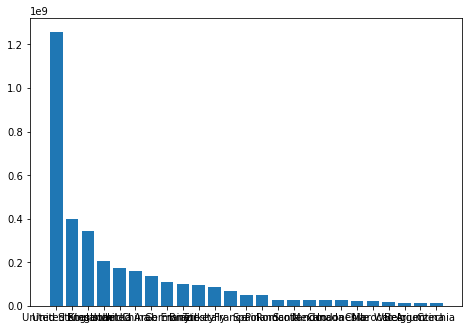

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)

In [10]:
df_covid_ph_vaccine_agg = df_covid_vaccine.groupby(['country'])['total_vaccinations_per_hundred'].sum().reset_index()
df_covid_ph_vaccine_agg = df_covid_ph_vaccine_agg.nlargest(25,['total_vaccinations_per_hundred']).reset_index()
del df_covid_ph_vaccine_agg['index']
df_covid_ph_vaccine_agg

,country,total_vaccinations_per_hundred
0,Israel,2384.97
1,Gibraltar,1731.86
2,United Arab Emirates,1377.32
3,Seychelles,782.39
4,England,608.49
5,United Kingdom,588.57
6,Northern Ireland,575.90
7,Wales,562.20
8,Scotland,515.74
9,Bahrain,459.49


In [11]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=df_covid_ph_vaccine_agg['country'],y=df_covid_ph_vaccine_agg['total_vaccinations_per_hundred'])])
#fig.update_layout('Israel is clearly leading the way')
fig.show()

cummulative vaccination across dates for all countrues


In [13]:
df_covid_vacc_daily = df_covid_vaccine[['date','daily_vaccinations']].sort_values('date',ascending=True)

In [15]:
df_covid_vacc_daily = df_covid_vacc_daily.groupby(['date'])['daily_vaccinations'].sum().reset_index()

In [16]:
df_covid_vacc_daily['total_cum'] = df_covid_vacc_daily.groupby('date')['daily_vaccinations'].cumsum()

In [18]:
import plotly.express as px
fig = px.line(df_covid_vacc_daily,x='date',y='total_cum',title='Cummulative Daily Vaccinations across world')
fig.show()